In [2]:
import pandas
import pickle
import itertools
import re
from pg import DB
db = DB()

In [3]:
n=8
fileName = "files/intermediates/motifs_to_proteins_4_to_" + str(n) + ".pkl"
motifs_to_proteins = pickle.load( open( fileName, "rb" ) )
distanceMatrix_df = pandas.read_pickle(open( "files/intermediates/distanceMatrix.pkl", "rb" ))

In [4]:
fileName = "files/intermediates/motifs_to_proteins_shuffled_4_to_" + str(n) + ".pkl"
motifs_to_proteins_shuffled = pickle.load( open( fileName, "rb" ) )

In [5]:
len(motifs_to_proteins)
# motifs_to_proteins_series = pandas.Series(motifs_to_proteins)
lengths = []
for motif in motifs_to_proteins:
    if( len(motifs_to_proteins[motif]) < 2):
        continue
    lengths.append(len(motifs_to_proteins[motif]))
lengths_series = pandas.Series(lengths)
lengths_series.describe()

count    64846.000000
mean        83.134318
std         82.542947
min          2.000000
25%         18.000000
50%         68.000000
75%        118.000000
max       1381.000000
dtype: float64

In [6]:
len(motifs_to_proteins_shuffled)
# motifs_to_proteins_series = pandas.Series(motifs_to_proteins)
lengths = []
for motif in motifs_to_proteins_shuffled:
    if( len(motifs_to_proteins_shuffled[motif]) < 2):
        continue
    lengths.append(len(motifs_to_proteins_shuffled[motif]))
lengths_series = pandas.Series(lengths)
lengths_series.describe()

count    65536.000000
mean        84.278366
std         59.906043
min         16.000000
25%         51.000000
50%         66.000000
75%         95.000000
max       1227.000000
dtype: float64

In [ ]:
%%time
%%capture
for motif in motifs_to_proteins:
    if(db.query("SELECT motif_string FROM motifss where motif_string = '" + motif + "'").ntuples() > 0):
        continue
    if( len(motifs_to_proteins[motif]) < 2 or  len(motifs_to_proteins_shuffled[motif]) < 2):
        continue
    proteins = motifs_to_proteins[motif]
    proteins_shuffled = motifs_to_proteins_shuffled[motif]
    motif_to_subgraphs = [];
    motif_to_shuffled_subgraphs = [];
    for protein_i in proteins:#original subgraph
        row = []
        for protein_j in proteins:
#             if(protein_i != protein_j):
            row.append(distanceMatrix_df[protein_i][protein_j])
        motif_to_subgraphs.append(row)
        
    for protein_shuffled_i in proteins_shuffled:#shuffled subgraph
        row_shuffled = []
        for protein_shuffled_j in proteins_shuffled:
#             if(protein_shuffled_i != protein_shuffled_j):
            row_shuffled.append(distanceMatrix_df[protein_shuffled_i][protein_shuffled_j])
        motif_to_shuffled_subgraphs.append(row_shuffled)
        
    do_not_print = db.insert('motifss',
                             motif_string=motif, 
                             proteins= proteins, 
                             proteins_length= len(proteins),
                             subgraph=motif_to_subgraphs,
                             shuffled_proteins = proteins_shuffled,
                             shuffled_proteins_length = len(proteins_shuffled),
                             shuffled_subgraph = motif_to_shuffled_subgraphs
                            )

In [ ]:
sum(subgraphs['acgac']['ABCB9'].values())/len(subgraphs['acgac']['ABCB9'])

In [5]:
pickle.dump(subgraphs, open( "foo.p", "wb" ))

In [48]:
motifs_to_proteins_subgraphs = pickle.load( open( "foo.p", "rb" ) )



In [25]:
means = []
for motif in subgraphs:
    if(len(subgraphs[motif]) >2):
        for subgraph in subgraphs[motif]:
#             print(sum(subgraphs[motif][subgraph].values())/len(subgraphs[motif][subgraph]))
            means.append(sum(subgraphs[motif][subgraph].values())/len(subgraphs[motif][subgraph]))

0.00367639530641
0.00331416536589
0.00340317189871
-0.00421344909555
0.00790817894245
0.00237380970964
0.0274522186669
-0.00659685472356
0.00228383488294
0.000471064523063
0.0128564922852
-0.0114712618139
-0.00615197972172
-0.00203580272495
-0.011842628265
-0.00778450556392
-0.00831766053853
-0.017180159094
-0.00308651779623
-0.0055720991003
-0.00469803426335
-0.00278832367953
-0.0113622987851
-0.0143476814975
-0.0197248605206
-0.00410542032788
0.00273599179652
-0.0101413131915
-0.0200988662006
-0.00631951390584
0.000461333148566
-0.00869542798293
-0.027766216492
-0.0100895323523
-0.034501743323
0.0127461731187
0.0821927359389
0.0549318689799
0.0487904218182
0.0487904218182
0.00347088925097
-0.0154571342691
-0.0170348047442
0.000418791859685
0.00439155887244
0.0367487677069
0.114714647892
0.0847211699224
0.0977994919227
0.0927921035407
0.0838081084697
0.0781835459044
0.0723433405041
0.0543797639534
0.0541134342297
0.0366825221961
0.0275344823764
0.0511262174776
0.0712378281409
0.073992

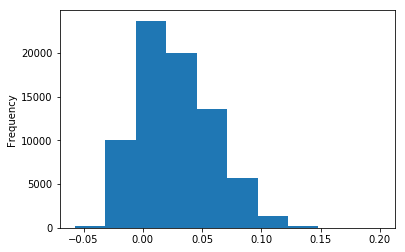

In [26]:
%matplotlib inline

import matplotlib
foo = pandas.Series(means).plot(kind='hist')

In [29]:
from pg import DB
db = DB()
db.query("""create table motifss(
         motif_string VARCHAR primary key,
         proteins VARCHAR[],
         proteins_length integer,
         subgraph float[][],
         shuffled_proteins VARCHAR[],
         shuffled_proteins_length integer,
         shuffled_subgraph float[][]
        )""")

In [57]:
motifs_to_subgraphs['aaccgc']
# len(motifs_to_proteins['aaccgc'])

[[0.69764064397319003,
  0.73003515560527699,
  0.63247850135828199,
  0.84986557353397296,
  0.51400145560745003,
  -0.059565725918322897,
  -0.071627346155198904,
  -0.033091095592789603,
  -0.028960853735967199,
  -0.051553889214770998,
  -0.060103428367553197,
  -0.045222567968918201,
  -0.0260212773614267,
  -0.0051464762647111901,
  -0.024328993612577499,
  -0.070224706938201306,
  -0.0593088762428709,
  -0.028879533592515501,
  -0.033137683621514397,
  0.039247324330491801,
  0.010021776298448601,
  -0.038650803069010198,
  -0.059593031327659203,
  -0.032815219361442799,
  -0.028080083316580701,
  -0.035133832961470303,
  0.071261368665123101,
  0.020930265331667398,
  -0.037996614429453499,
  -0.045205112197606298,
  -0.0669304151124228,
  -0.10068950612487899,
  -0.048712804792991803,
  -0.049430011987869102,
  -0.050179679187236197,
  0.086131722467424301,
  -0.018032263807324998,
  -0.0242863807032004,
  -0.0242863807032004,
  0.0405468058936546,
  0.0080979070043881596,
  0

In [136]:
motifNames = db.query("SELECT motif_string FROM motifs").ntuples()
motifNames

2341

In [141]:
%%time
db.insert(
    'motifs',
    motif_string='aaccgc', 
    proteins= motifs_to_proteins['aaccgc'], 
    proteins_length= len(motifs_to_proteins['aaccgc']),
    subgraph=motifs_to_subgraphs['aaccgc']
    )

ProgrammingError: ERROR:  relation "motifs" does not exist
LINE 1: INSERT INTO "motifs" ("motif_string", "proteins", "proteins_...
                    ^


In [101]:
foo[0][0]

1

In [168]:
db.query("DROP TABLE motifs")